# **10. Comparison of various Machine Learning Algorithms**

## 1. Importing necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

## 2. Loading the dataset

In [2]:
db = pd.read_csv("diabetes.csv")

In [3]:
df = pd.DataFrame(db)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Data preprocessing:

### i. Check for Missing Values 

In [8]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [10]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Correlation Matrix:

In [11]:
correlation_matrix= df.corr()

<AxesSubplot:>

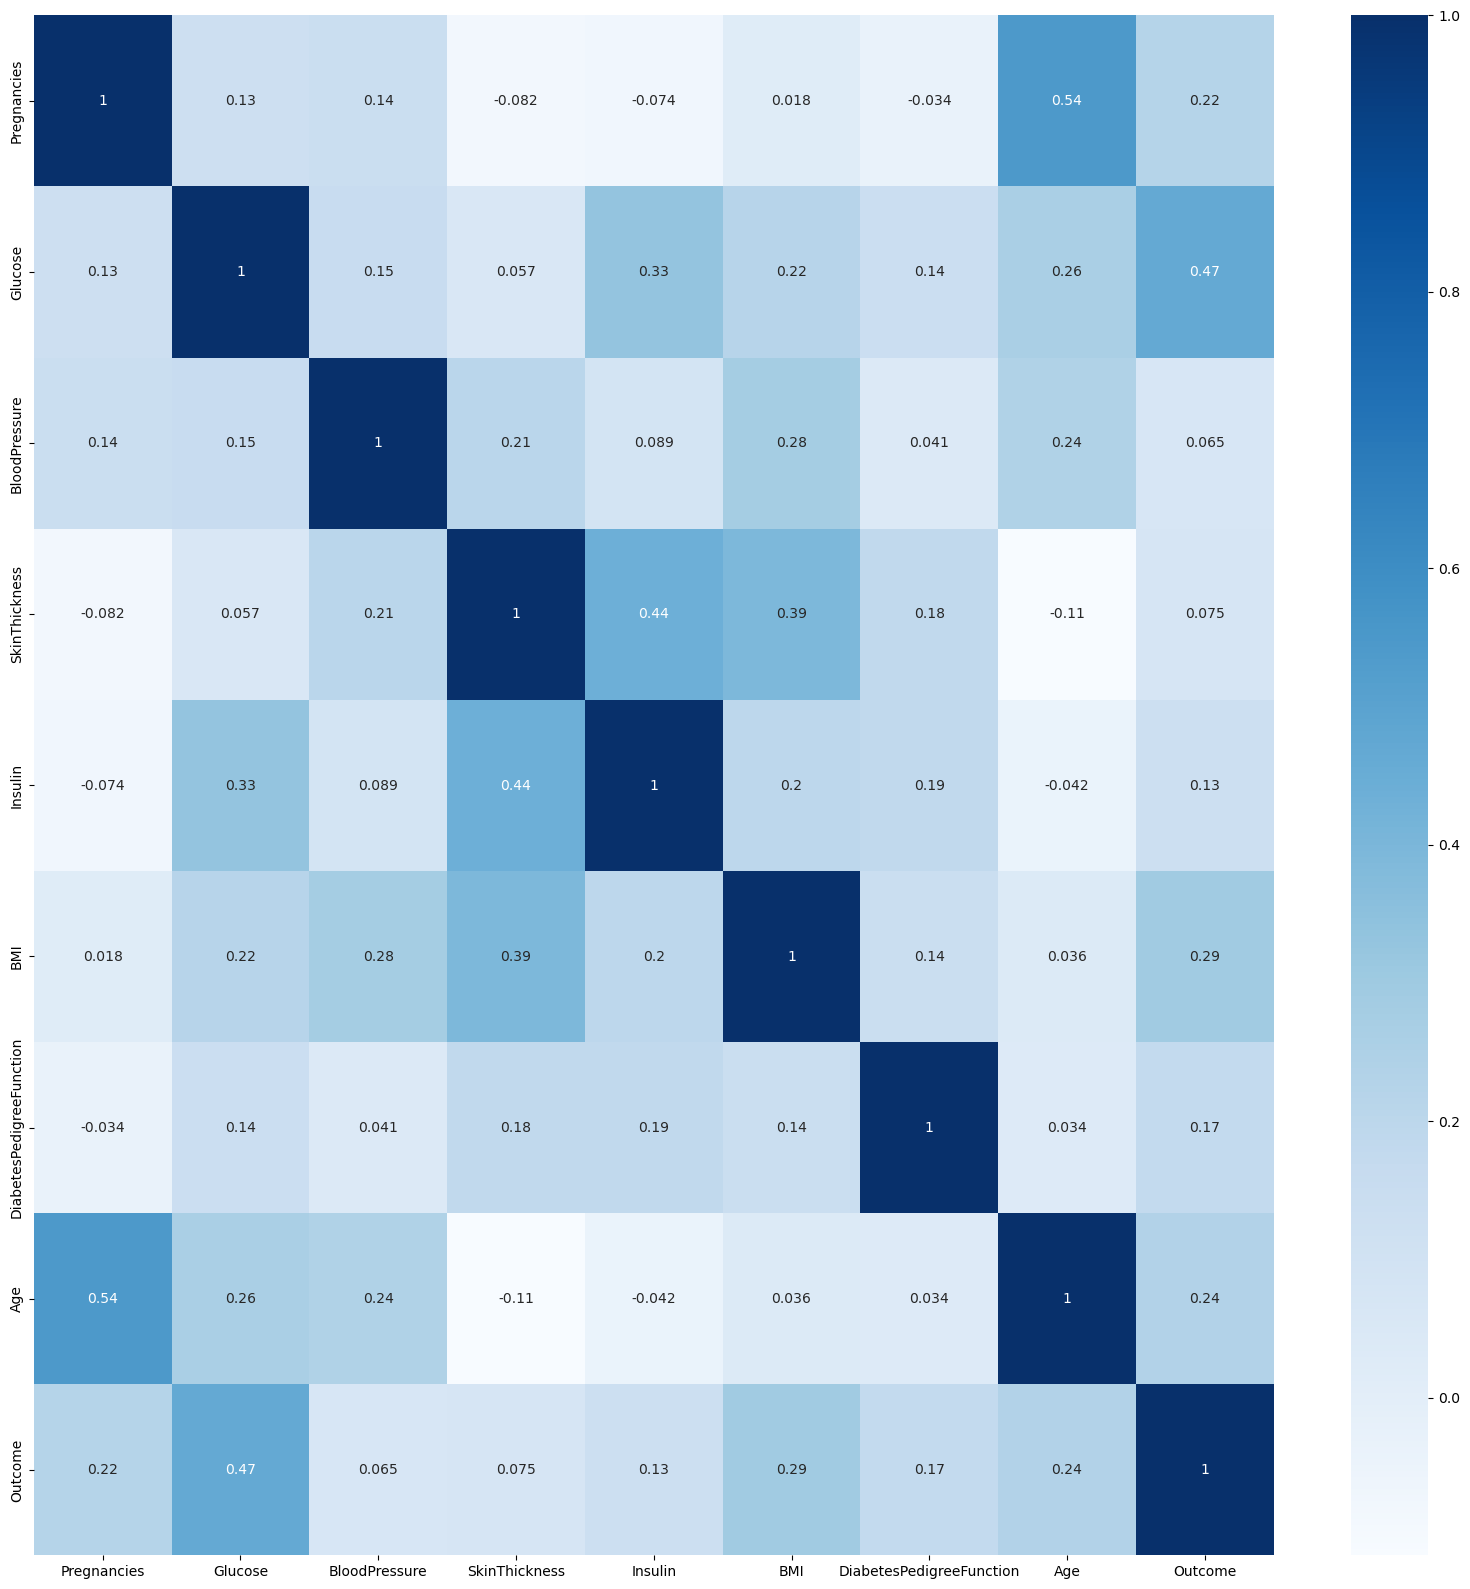

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, annot=True, cmap="Blues")

## 4. Splitting the data into X->featues and y->target

In [13]:
X = df.drop(columns ="Outcome", axis=1)
y = df["Outcome"]

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
X.shape, y.shape

((768, 8), (768,))

## 5. Splitting the data into train and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
X_train.shape ,y_train.shape

((614, 8), (614,))

In [19]:
X_test.shape, y_test.shape

((154, 8), (154,))

## 6. Normalize the data

In [20]:
scaler= StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

## 7. Evaluating using Different models

## 7.1 Decision Tree

In [21]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.7272727272727273


## 7.2 Logistic Regression

In [22]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Accuracy: 0.7662337662337663


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 7.3 Multilayer Perceptron

In [23]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(80, 50), max_iter=1000, learning_rate_init=0.001)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print("Multilayer Perceptron Accuracy:", accuracy_score(y_test, mlp_predictions))

Multilayer Perceptron Accuracy: 0.7142857142857143


## 7.4 Support Vector Machine

In [24]:
svm_classifier = SVC()
svm_classifier.fit(X_train_norm, y_train)
svm_predictions = svm_classifier.predict(X_test_norm)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Accuracy: 0.7467532467532467


## 7.5 Adaboost Classifier

In [25]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
adaboost_predictions = adaboost_classifier.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost_predictions))

AdaBoost Accuracy: 0.7207792207792207


## 7.6 Bagging using Random Forest

In [26]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.7597402597402597


## 7.7 K-means Clustering

In [28]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
kmeans_predictions = kmeans.predict(X_test)
print("K-Means Accuracy (using clusters):", accuracy_score(y_test, kmeans_predictions))

K-Means Accuracy (using clusters): 0.6818181818181818


In [29]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
ada_accuracy = accuracy_score(y_test, adaboost_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

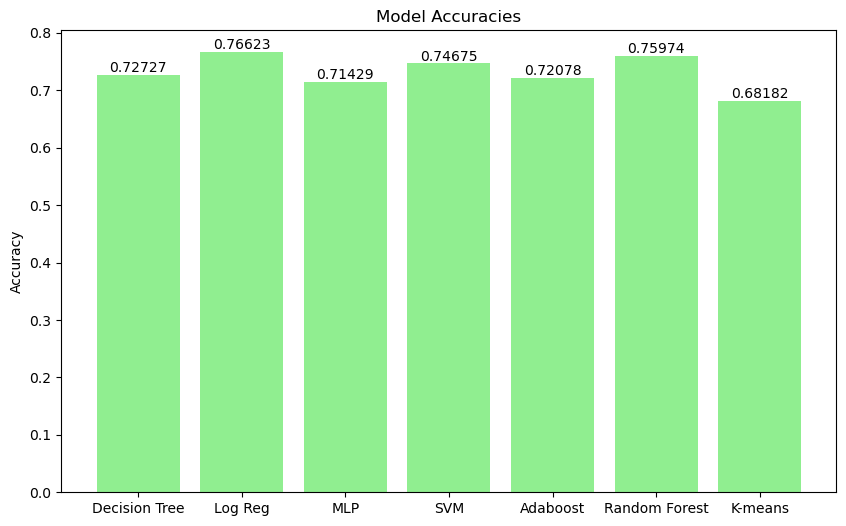

In [30]:
import matplotlib.pyplot as plt

# # Assuming you have defined the accuracies_valuesb and models_namesb lists
accuracies_valuesb = [dt_accuracy, lr_accuracy, mlp_accuracy, svm_accuracy, ada_accuracy, rf_accuracy, kmeans_accuracy]
models_namesb = ["Decision Tree", "Log Reg", "MLP", "SVM", "Adaboost", "Random Forest", "K-means"]

# # Visualize accuracies with vertical bars and annotations
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models_namesb, accuracies_valuesb, color='lightgreen')

# # Add annotations on top of each bar
for bar in bars:
     yval = bar.get_height()
     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


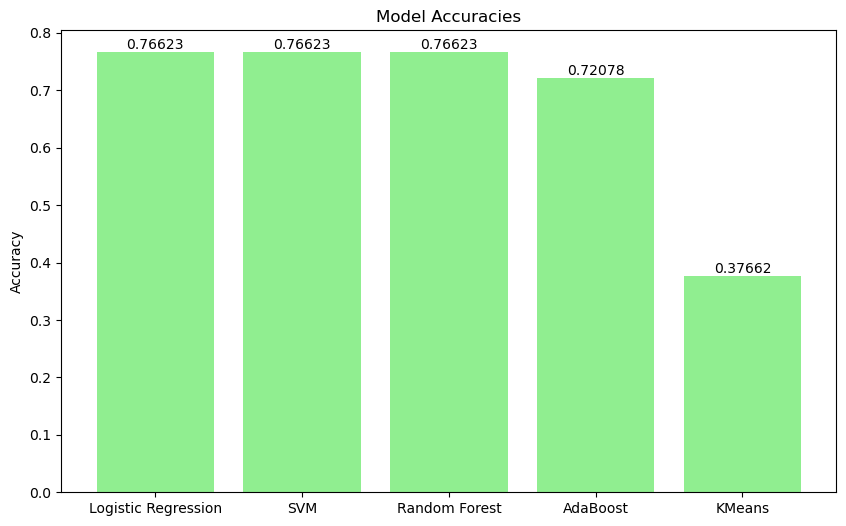

In [34]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KMeans": KMeans(n_clusters=3, n_init=10),  # Assuming 3 clusters for KMeans
}

accuracies = {}
for model_name, model in models.items():
    if "KMeans" not in model_name:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    else:
        model.fit(X_train_pca)  # KMeans does not use labels during fit
        predictions = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, predictions)
    accuracies[model_name] = accuracy

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models_names, accuracies_values, color='lightgreen')

for bar in bars:
     yval = bar.get_height()
     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 5), ha='center', va='bottom')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')

plt.show()